In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import geopandas as gpd
import os
import re

In [144]:
def get_measurements(path, convert_time=False):
    files = os.listdir(path)
    
    data = [pd.read_csv(path + "/" + i, sep = ";") for i in files]
    data =  pd.concat(data, sort = False, ignore_index = True)
    
    data["RG_ID"] = data["Tagname"].str.slice(9,13).astype(int)
    data["Value"] = data["Value"].str.replace(",", ".").astype(float)
    data["DataQuality"] = (data["DataQuality"] == "Good").astype(int)
    if convert_time == True:
        data["TimeStamp"] = pd.to_datetime(data["TimeStamp"])
        
    data = data[["Tagname", "RG_ID", "TimeStamp", "Value", "DataQuality"]]
    
    flow_data = data[data["Tagname"].str.contains("Debietmeting")].reset_index(drop = True)
    level_data = data[data["Tagname"].str.contains("Niveaumeting")].reset_index(drop = True)
    
    flow_data.drop("Tagname", axis=1, inplace=True)
    level_data.drop("Tagname", axis=1, inplace=True)
    
    return flow_data, level_data
    

In [145]:
flow_data, level_data = get_measurements("D:/waterschap-aa-en-maas_sewage_2019/sewer_data/data_pump/RG8150/RG8150")

In [177]:
def get_rain(path, convert_time=False):
    files = os.listdir(path)
    
    data = [pd.read_csv(path + "/" + i, skiprows=2) for i in files]
    data =  pd.concat(data, sort = False, ignore_index = True)
    if convert_time == True:
        data["Begin"] = pd.to_datetime(data["Begin"])
        data["Eind"] = pd.to_datetime(data["Eind"])
    
    data.rename({"Begin": "Start", "Eind": "End"}, axis=1, inplace = True)
    
    return data

In [178]:
rain_data = get_rain("D:/waterschap-aa-en-maas_sewage_2019/sewer_data/rain_timeseries")

In [ ]:
def get_rain_prediction(path, convert_time=False):
    files = os.listdir(path)
    
    

In [186]:
file = os.listdir("D:/waterschap-aa-en-maas_sewage_2019/sewer_data/rain_grid_prediction/knmi.harmonie_2018-01-01_2019-08-29")[0]
file.split("_")

['Knmi.Harmonie',
 '99.0.1.61.105',
 '2018-01-01T00h00m00s',
 '2018-01-02T00h00m00s',
 '2018-01-02T01h00m00s.asc']

In [5]:
myArray  = np.loadtxt("D:/waterschap-aa-en-maas_sewage_2019/sewer_data/rain_grid_prediction/knmi.harmonie_2018-01-01_2019-08-29/Knmi.Harmonie_99.0.1.61.105_2018-01-01T00h00m00s_2018-01-02T14h00m00s_2018-01-02T15h00m00s.asc", skiprows=7)


In [7]:
myArray

array([[ 4.01900411e-02,  1.96822286e-02,  5.03379107e-03, ...,
         1.50918961e-04,  1.50918961e-04,  1.50918961e-04],
       [ 1.11479163e-01,  6.06979132e-02,  1.87057257e-02, ...,
         1.50918961e-04,  1.50918961e-04, -8.25643539e-04],
       [ 2.07182288e-01,  1.24174476e-01,  4.01901007e-02, ...,
         1.50918961e-04,  1.50918961e-04, -8.25643539e-04],
       ...,
       [ 1.03666306e-01,  1.76908493e-01,  2.42338181e-01, ...,
         4.01897430e-02,  1.10502243e-01,  2.86283493e-01],
       [ 9.48772430e-02,  1.51517868e-01,  1.90580368e-01, ...,
         1.96819305e-02,  4.89788055e-02,  1.19291306e-01],
       [ 1.29056931e-01,  2.13041306e-01,  2.67728806e-01, ...,
         1.18694305e-02,  3.04241180e-02,  5.97209930e-02]])

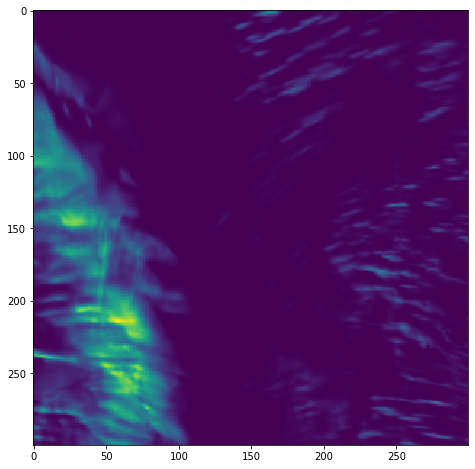

In [41]:
plt.figure(figsize=(8,8))
plt.imshow(myArray)

In [92]:
system_data = pd.read_excel("D:/waterschap-aa-en-maas_sewage_2019/sewer_model/20180717_dump riodat rioleringsdeelgebieden.xlsx", skiprows=9)
#system_data = system_data[["Code", "Naam / lokatie", "Eigendom", "Type riol st", "RWZI"]]
system_data.head()

,Volgnr,Code,Kern,Naam kern,Naam / lokatie,Eigendom,Type riol st,Afv cap,Afvoer lok.,Afv wijze,Begin,ONP,Afvoer naar,RWZI,Afdrukvolgnr
0,671,AST-AST-CAM,AST-AST-4,Asten(Campina),Hazeldonk/Campinaterrein,gemeente,VGS,"0,0 m3/u",v Kuppenstraat 400,R.G.,x,x,NaN,R.W.Z.I. Asten,11.0
1,1469,AST-AST-FLO,AST-AST-3,Asten (ind. Nobis),Florapark,gemeente,dwa,NaN,NaN,R.G.,x,NaN,AST-AST-IND,R.W.Z.I. Asten,3.0
2,663,AST-AST-HOO,AST-AST-1,Asten,Oliemolen/ind. Hoogveld,gemeente,Gem,"0,0 m3/u",2x Oliemolen 6 en Laagveld 3,R.G.,NaN,NaN,AST-AST-KOM,R.W.Z.I. Asten,3.0
3,670,AST-AST-HOT,AST-AST-2,Asten (Hotel Nobis),hotel Nobisweg,particulier,dwa,"0,0 m3/u",Nobisweg,R.G.,x,x,NaN,R.W.Z.I. Asten,10.0
4,1412,AST-AST-HUT,AST-AST-6,injectiepunt Dkr,Texaco-streng 22(op RG Hutten),particulier,Dkr,"0,0 m3/u",NaN,R.G.,x,x,NaN,R.W.Z.I. Asten,1.0


In [51]:
RWZI_asten = pd.read_excel("D:/waterschap-aa-en-maas_sewage_2019/sewer_model/20180717_dump riodat riolerirngsdeelgebieden detail RWZI Asten.xlsx", skiprows=10)
RWZI_asten.head()

,Gem.kern Code,Code,Gemeente,Gem.kern Naam,RWZI,Naam/Locatie,Type Rioolstels.,Inwoners,Wooneenheden,dwa inw m3/u,...,poc totaal m3/u,Totaal eigen m3/u,Doorvoer m3/u,Totaal m3/u,Berging Gem (m3),Berging VGS (m3),Berging Gem (mm),Berging VGS (mm),Afvoer naar,Opmerking
0,AST-AST-4,AST-AST-CAM,Asten,Asten(Campina),Asten,Hazeldonk/Campinaterrein,VGS,0,0.0,0.0,...,4.8,7.2,0,7.2,NaN,81.0,NaN,"3,4",NaN,Injecteerd in VV naar rwzi.\r\nBRP 24 aug 2012...
1,AST-AST-3,AST-AST-FLO,Asten,Asten (ind. Nobis),Asten,Florapark,dwa,0,0.0,0.0,...,0.0,19.8,0,19.8,0.0,NaN,0.0,NaN,AST-AST-IND,NaN
2,AST-AST-1,AST-AST-HOO,Asten,Asten,Asten,Oliemolen/ind. Hoogveld,Gem,12,4.0,0.1,...,77.7,110.0,0,110.0,631.0,NaN,5.7,NaN,AST-AST-KOM,BRP 24 aug 2012.\r\nVerificatie 2012.
3,AST-AST-2,AST-AST-HOT,Asten,Asten (Hotel Nobis),Asten,hotel Nobisweg,dwa,0,0.0,0.0,...,0.0,6.0,0,6.0,160.0,NaN,4.0,NaN,AST-AST-ONP,DWA obv drinkwaterverbruik 2003: 10158 m?. pie...
4,AST-AST-6,AST-AST-HUT,Asten,injectiepunt Dkr,Asten,Texaco-streng 22(op RG Hutten),Dkr,0,NaN,0.0,...,0.0,19.0,0,19.0,0.0,NaN,0.0,NaN,NaN,"BRP 24 aug 2012.\r\nVerificatie 2012, BZP.\r\n..."


In [74]:
surface_data = pd.read_csv("D:/waterschap-aa-en-maas_sewage_2019/sewer_model/surfacearea_sewersystems.txt", sep=";")
surface_data["Area"] = surface_data["Area"].str.replace(",", ".").astype(float)
#surface_data = surface_data[["RGDIDENT", "TYPRGD", "NAAMRGD", "RGDID", "Area"]]
surface_data.head()

,FID,RGDIDENT,TYPRGD,NAAMRGD,RGDID,GEOMETRIE_,GEOMETRIE1,Area
0,0,CUI-CUI-BEI,1,Beijerd en 't Riet,316,"0,000000000000000","0,000000000000000",972233.664525
1,1,HEL-HEL-AKI,2,30. Akkers I,792,"0,000000000000000","0,000000000000000",373952.057344
2,2,HER-ROS-OVE,1,gebied E; Overlaet E,97,"0,000000000000000","0,000000000000000",711823.358004
3,3,HER-HER-ORP,1,Geb. 8 Orthenpoort,539,"0,000000000000000","0,000000000000000",190067.950313
4,4,HER-BRA-BRA,2,de Brand,770,"0,000000000000000","0,000000000000000",658138.191970


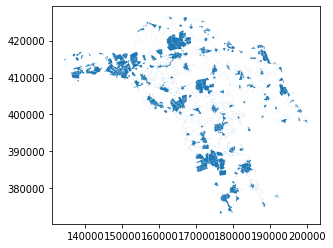

In [238]:
brabant = gpd.read_file("D:/waterschap-aa-en-maas_sewage_2019/sewer_model/aa-en-maas_sewer_shp/Rioleringsdeelgebied.shp")
brabant.plot()

In [239]:
brabant.crs

{'init': 'epsg:28992'}

In [157]:
brabant

,RGDIDENT,TYPRGD,NAAMRGD,RGDID,GEOMETRIE_,GEOMETRIE1,geometry
0,CUI-CUI-BEI,1,Beijerd en 't Riet,316,0.0,0.0,"POLYGON ((188476.626 415967.071, 188542.047 41..."
1,HEL-HEL-AKI,2,30. Akkers I,792,0.0,0.0,"POLYGON ((172555.205 385189.083, 172472.248 38..."
2,HER-ROS-OVE,1,gebied E; Overlaet E,97,0.0,0.0,"POLYGON ((153801.956 415030.312, 153801.194 41..."
3,HER-HER-ORP,1,Geb. 8 Orthenpoort,539,0.0,0.0,"POLYGON ((149224.757 412105.929, 149224.116 41..."
4,HER-BRA-BRA,2,de Brand,770,0.0,0.0,"POLYGON ((153600.725 410510.338, 153375.621 41..."
5,SMI-BER-WES,1,Westerbroek,764,0.0,0.0,"POLYGON ((156283.706 409420.243, 156247.462 40..."
6,HER-ROS-HON,1,gebied C1; Hondberg-noord,99,0.0,0.0,"POLYGON ((153930.318 415070.217, 153947.709 41..."
7,MIL-WIL-MOE,3,Moerboom,375,0.0,0.0,"POLYGON ((181916.086 407480.847, 181766.035 40..."
8,BOX-VIE-SPO,0,Spoorstraat,932,0.0,0.0,"POLYGON ((197356.029 401146.338, 197372.911 40..."
9,HER-HER-TOL,1,geb. 6c Carolushof,543,0.0,0.0,"POLYGON ((149353.012 411503.015, 149255.361 41..."


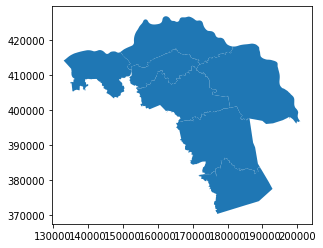

In [60]:
brabant = gpd.read_file("D:/waterschap-aa-en-maas_sewage_2019/sewer_model/aa-en-maas_sewer_shp/Zuiveringsregio.shp")
brabant.plot()

In [61]:
brabant.head()

,GAGIDENT,GAGNAAM,GAGSOORT,GAGFUNC,geometry
0,R.W.Z.I. Asten,R.W.Z.I. Asten,64,1230,"POLYGON ((179944.9 386061.09, 179838.507 38574..."
1,R.W.Z.I. Aarle-Rixtel,R.W.Z.I. Aarle-Rixtel,64,1230,"POLYGON ((182680.943 401081.192, 182705.138 40..."
2,R.W.Z.I. Dinther,R.W.Z.I. Dinther,64,1230,"POLYGON ((170102.43 412464.901, 170105.662 412..."
3,R.W.Z.I. Oijen,R.W.Z.I. Oijen,64,1230,"(POLYGON ((165400 425304, 165500 425300, 16560..."
4,R.W.Z.I. Den Bosch,R.W.Z.I. Den Bosch,64,1230,"POLYGON ((144351.894 416881.192, 144400 416848..."


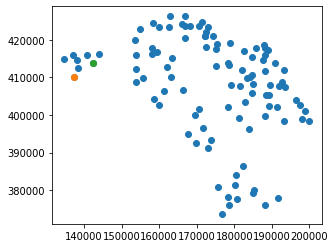

In [93]:
fig, ax = plt.subplots()

brabant = gpd.read_file("D:/waterschap-aa-en-maas_sewage_2019/sewer_model/aa-en-maas_sewer_shp/Rioolgemaal.shp")
brabant.plot(ax = ax)
brabant[brabant["ZREIDENT"] == "8150"].plot(ax = ax)
brabant[brabant["ZREIDENT"] == "8170"].plot(ax = ax)

In [94]:
brabant.head()

,ZRE_ID,ZRE_TYPE,ZAT_ZAT_ID,ZBM_ZBM_ID,ZREIDENT,ZRW_ZRW_ID,XXXAFMET,ZRNOMSCH,RRVTYPE,ZRBCAP,...,IWS_EIGENA,IWS_BREEDT,IWS_LENGTE,IWS_OPSTEL,IWS_DOCUME,RICHTING,IWS_PLAATS,IWS_BOUWJA,IWS_OPMERK,geometry
0,196,None,0,0,9220,16,0.0,None,0,0,...,1,0.0,0.0,0,None,0.0,5394AK / Kloosterstraat 5,1984,None,POINT (162942.412 426258.882)
1,251,None,0,0,7260,15,0.0,None,0,0,...,1,0.0,0.0,0,None,0.0,5441BP / Raamhof(nabij 30),1988,Afname afspraak obv voorstel WS.,POINT (193154.469 412108.068)
2,184,None,0,0,3130,20,0.0,None,0,0,...,1,0.0,0.0,0,None,0.0,5473HX / Aakantstraat 9923,1968,"Invoer op de rwzi na de vijzels ""op hoogte"".",POINT (161213.735 406511.617)
3,210,None,0,0,4170,0,0.0,None,0,0,...,1,0.0,0.0,0,None,0.0,5751CE / Zandbosweg 4,1978,None,POINT (182225.213 386391.833)
4,197,None,0,0,9210,16,0.0,None,0,0,...,1,0.0,0.0,0,None,0.0,5395TE / Hoefstraat 2,1981,None,POINT (162608.462 423340.712)


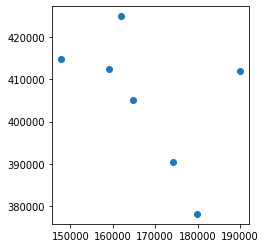

In [91]:
brabant = gpd.read_file("D:/waterschap-aa-en-maas_sewage_2019/sewer_model/aa-en-maas_sewer_shp/RWZI.shp")
brabant.plot()

In [187]:
CRS_PROJ4 = "+proj=sterea +lat_0=52.15616055555555 +lon_0=5.38763888888889 +k=0.9999079 +x_0=155000 +y_0=463000 +ellps=bessel +towgs84=565.2369,50.0087,465.658,-0.406857,0.350733,-1.87035,4.0812 +units=m +vunits=m +no_defs"

In [188]:
import linecache
line1 = linecache.getline("D:/waterschap-aa-en-maas_sewage_2019/sewer_data/rain_grid_prediction/knmi.harmonie_2018-01-01_2019-08-29/Knmi.Harmonie_99.0.1.61.105_2018-01-01T00h00m00s_2018-01-02T14h00m00s_2018-01-02T15h00m00s.asc", 1)

In [235]:
def extract_reference(file_path):
    features = [linecache.getline(file_path, i) for i in range(1,7)]
    features = [float(re.sub(" +", " ", i.strip()).split()[1]) for i in features]
    return features

def grid_to_amersford(features):
    x = np.linspace(start = features[2], stop = features[2] + (features[0]-1) * features[4], num = int(features[0]))
    y = np.linspace(start = features[3], stop = features[3] + (features[1]-1) * features[5], num = int(features[1]))

    CRS_PROJ4 = "+proj=sterea +lat_0=52.15616055555555 +lon_0=5.38763888888889 +k=0.9999079 \
                 +x_0=155000 +y_0=463000 +ellps=bessel +towgs84=565.2369,50.0087,465.658,-0.\
                 406857,0.350733,-1.87035,4.0812 +units=m +vunits=m +no_defs"
    
    CRS_EPSG = "+init=epsg:28992"
    
    return grid

In [222]:
haha = extract_reference("D:/waterschap-aa-en-maas_sewage_2019/sewer_data/rain_grid_prediction/knmi.harmonie_2018-01-01_2019-08-29/Knmi.Harmonie_99.0.1.61.105_2018-01-01T00h00m00s_2018-01-02T14h00m00s_2018-01-02T15h00m00s.asc")

In [223]:
haha

[300.0, 300.0, -0.0185, 48.9885, 0.037, 0.023]

In [232]:
np.linspace(start = haha[2], stop = haha[2] + (haha[0]-1) * haha[4], num = int(haha[0]))

array([-0.0185,  0.0185,  0.0555,  0.0925,  0.1295,  0.1665,  0.2035,
        0.2405,  0.2775,  0.3145,  0.3515,  0.3885,  0.4255,  0.4625,
        0.4995,  0.5365,  0.5735,  0.6105,  0.6475,  0.6845,  0.7215,
        0.7585,  0.7955,  0.8325,  0.8695,  0.9065,  0.9435,  0.9805,
        1.0175,  1.0545,  1.0915,  1.1285,  1.1655,  1.2025,  1.2395,
        1.2765,  1.3135,  1.3505,  1.3875,  1.4245,  1.4615,  1.4985,
        1.5355,  1.5725,  1.6095,  1.6465,  1.6835,  1.7205,  1.7575,
        1.7945,  1.8315,  1.8685,  1.9055,  1.9425,  1.9795,  2.0165,
        2.0535,  2.0905,  2.1275,  2.1645,  2.2015,  2.2385,  2.2755,
        2.3125,  2.3495,  2.3865,  2.4235,  2.4605,  2.4975,  2.5345,
        2.5715,  2.6085,  2.6455,  2.6825,  2.7195,  2.7565,  2.7935,
        2.8305,  2.8675,  2.9045,  2.9415,  2.9785,  3.0155,  3.0525,
        3.0895,  3.1265,  3.1635,  3.2005,  3.2375,  3.2745,  3.3115,
        3.3485,  3.3855,  3.4225,  3.4595,  3.4965,  3.5335,  3.5705,
        3.6075,  3.6

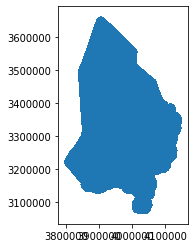

In [237]:
brabant = gpd.read_file("D:/Netherlands_shapefile/nl_1km.shp")
brabant.plot()